In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Greens, save_to_file = False):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize = (5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    # ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=sorted(classes), yticklabels=sorted(classes),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if save_to_file:
        plt.savefig(title + '.png')
    return ax

In [2]:
database = pd.read_csv(r"../../../data/PAD-UFES/metadata.csv")

database[['smoke','drink','pesticide','skin_cancer_history','cancer_history','has_piped_water','has_sewage_system','itch','grew','hurt','changed','bleed','elevation','biopsed']] = database[['smoke','drink','pesticide','skin_cancer_history','cancer_history','has_piped_water','has_sewage_system','itch','grew','hurt','changed','bleed','elevation','biopsed']].astype("bool")

# database = database.dropna().drop(['patient_id','lesion_id','img_id'], axis = 1)

database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   int64  
 2   smoke                2298 non-null   bool   
 3   drink                2298 non-null   bool   
 4   background_father    1480 non-null   object 
 5   background_mother    1476 non-null   object 
 6   age                  2298 non-null   int64  
 7   pesticide            2298 non-null   bool   
 8   gender               1494 non-null   object 
 9   skin_cancer_history  2298 non-null   bool   
 10  cancer_history       2298 non-null   bool   
 11  has_piped_water      2298 non-null   bool   
 12  has_sewage_system    2298 non-null   bool   
 13  fitspatrick          1494 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           1494 non-null   f

# Data Exploration

In [3]:
df = database.copy()

df.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,True,True,NaN,NaN,8,True,NaN,True,...,NaN,NEV,True,True,True,True,True,True,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,True,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,True,True,NaN,NaN,77,True,NaN,True,...,NaN,ACK,True,True,True,True,True,True,PAT_1545_1867_547.png,False
3,PAT_1989,4061,True,True,NaN,NaN,75,True,NaN,True,...,NaN,ACK,True,True,True,True,True,True,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,True,True,True,True,PAT_684_1302_588.png,True


In [4]:
df_n = df.copy()
df_n = df_n.fillna("na")
df_n.head(5).transpose()

,0,1,2,3,4
patient_id,PAT_1516,PAT_46,PAT_1545,PAT_1989,PAT_684
lesion_id,1765,881,1867,4061,1302
smoke,True,False,True,True,False
drink,True,False,True,True,True
background_father,na,POMERANIA,na,na,POMERANIA
background_mother,na,POMERANIA,na,na,POMERANIA
age,8,55,77,75,79
pesticide,True,False,True,True,False
gender,na,FEMALE,na,na,MALE
skin_cancer_history,True,True,True,True,True


In [39]:
cols = list(df_n.columns)
to_remove = ['patient_id', 'lesion_id', 'img_id', 'diagnostic']
for c in to_remove:
    cols.remove(c)
len(cols)


22

In [46]:
def percConvert(tab):
      return (tab/float(tab[-1])*100).round(decimals=0)
def plot_crosstab(cols):
    fig, axes = plt.subplots(6, 4, figsize=(50,50))
    i=-1
    i2=0
    for c in cols:
        i+=1
        if int(i % 6) == 0 and i !=0:
            i2+=1
            i=0
        s=pd.crosstab(df.diagnostic,df[c].isna(),margins=True).apply(percConvert, axis=0)
        sns.heatmap(s, annot=True, ax=axes[i,i2])

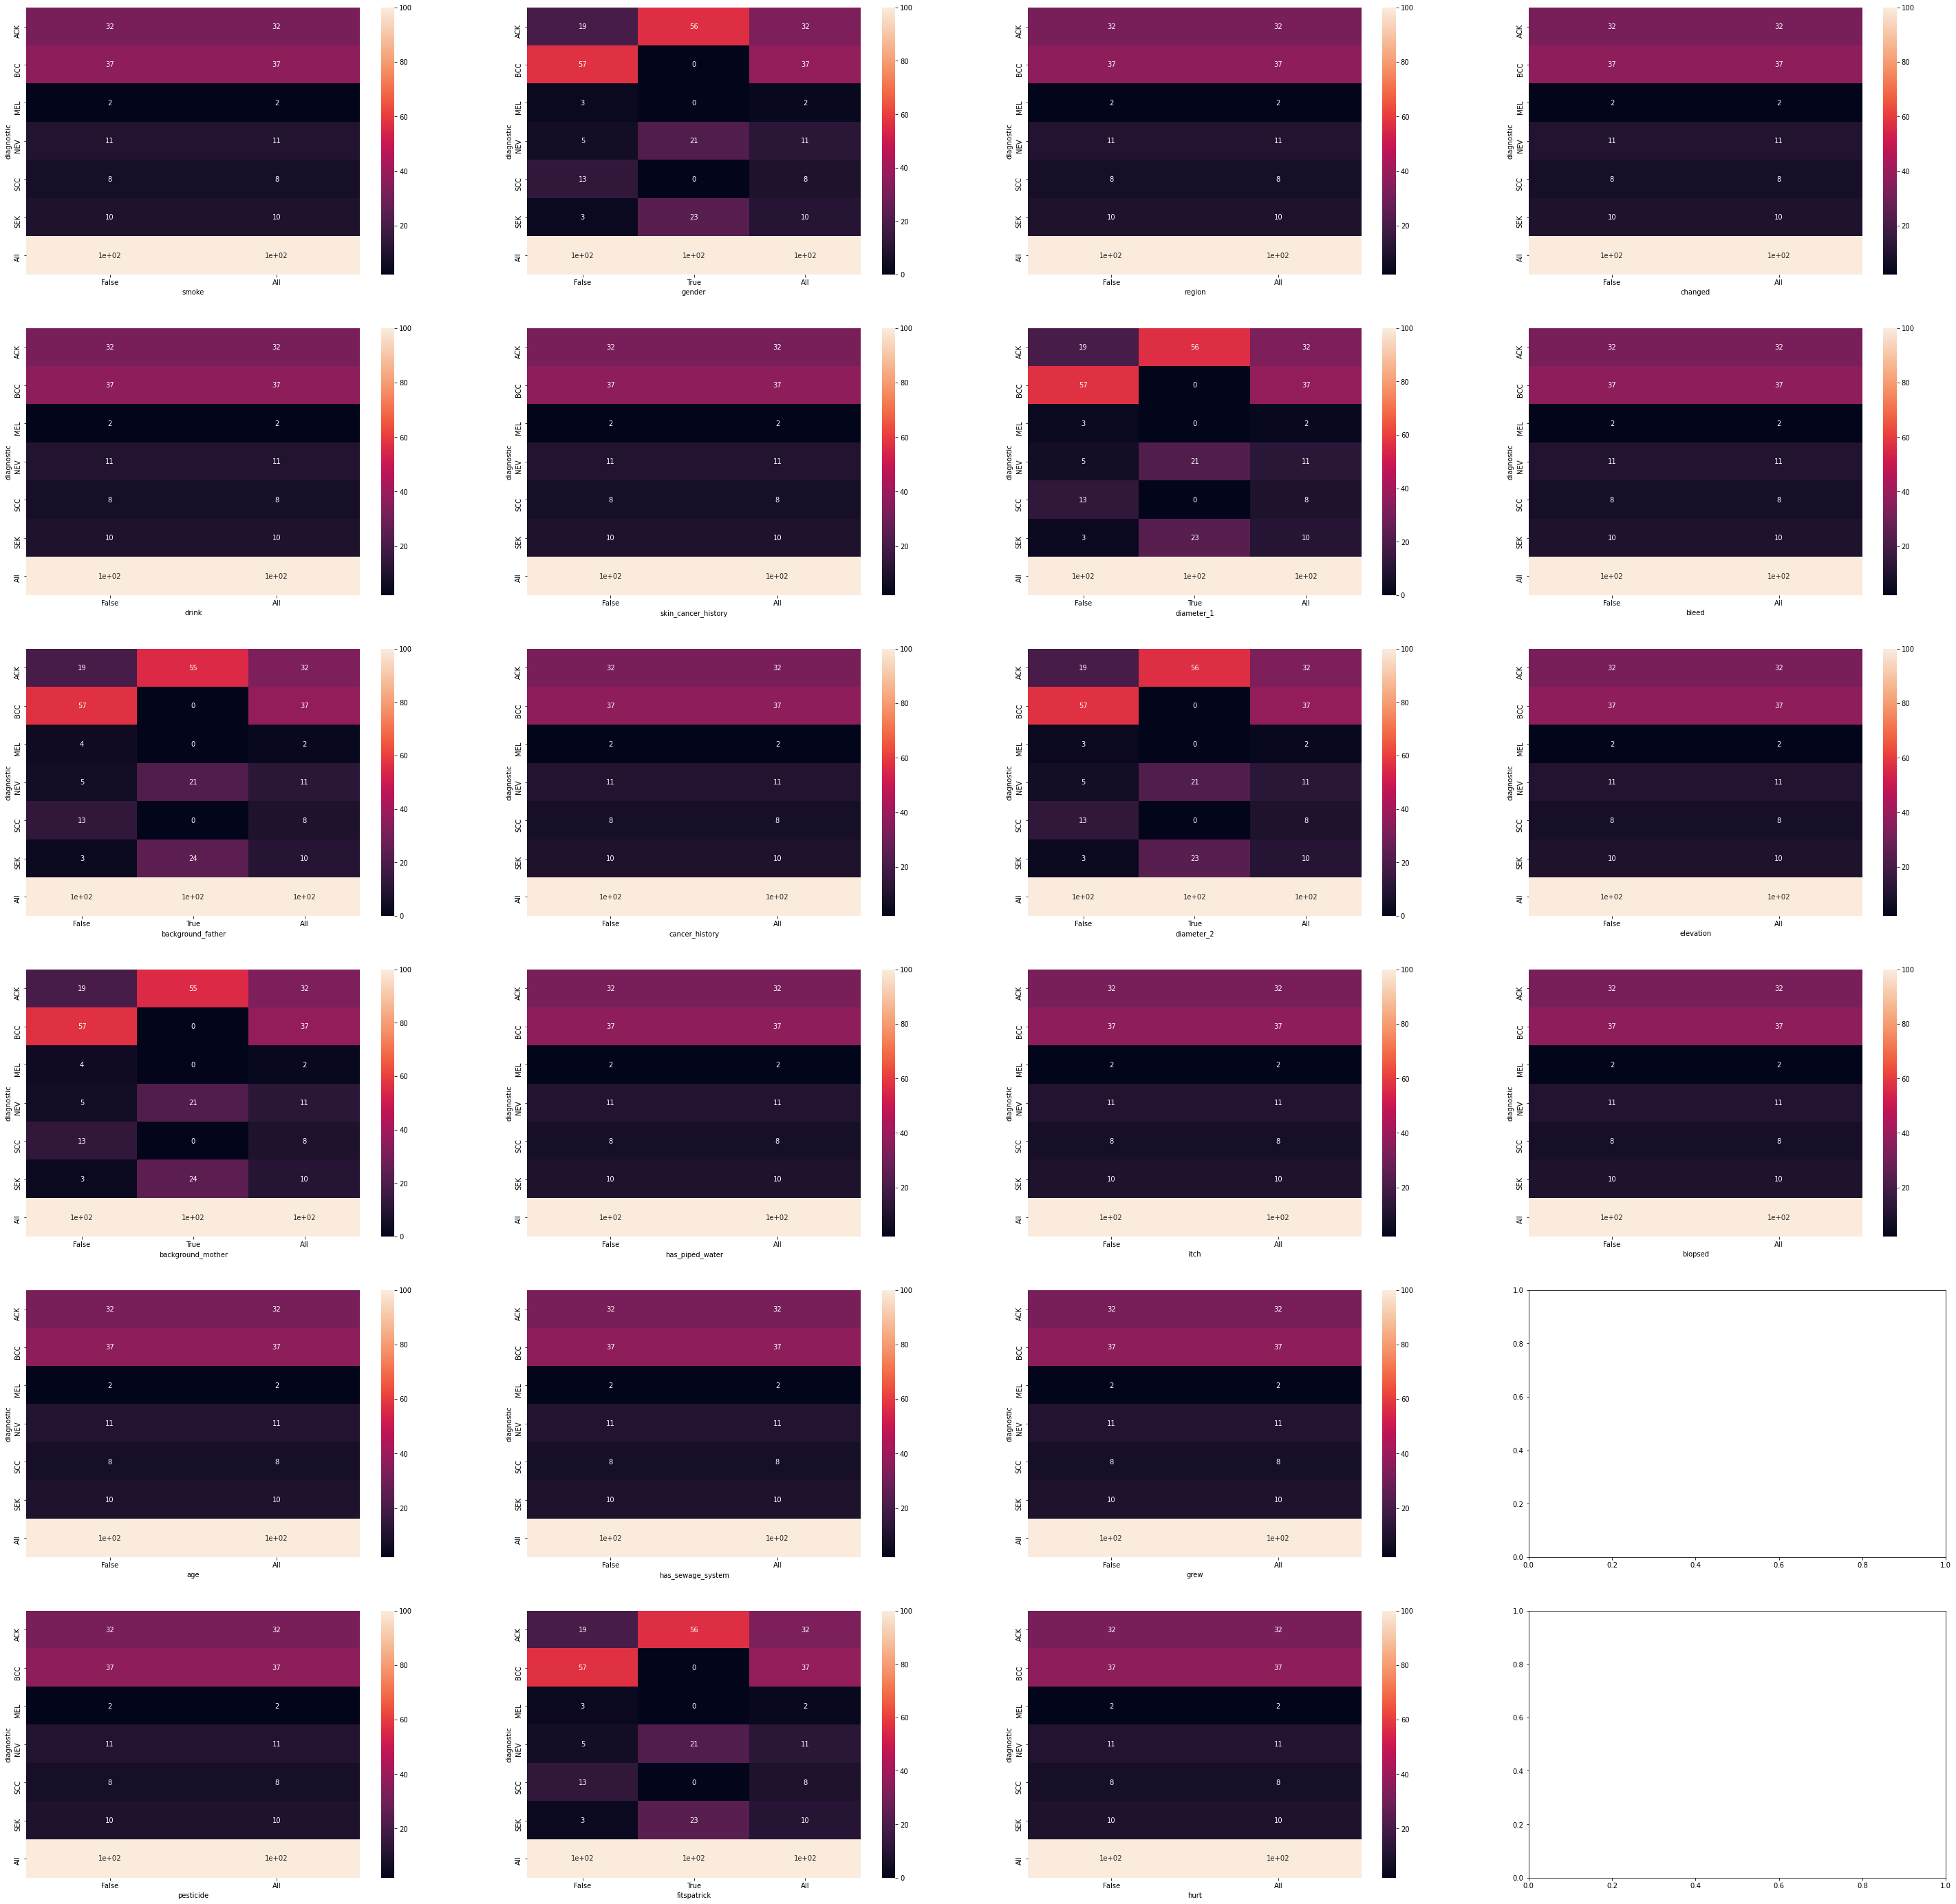

In [47]:
plot_crosstab(cols)

In [50]:
df = df.drop(['gender', 'fitspatrick', 'background_father','background_mother','diameter_1','diameter_2'], axis=1)


In [51]:
df.isna().sum()

patient_id             0
lesion_id              0
smoke                  0
drink                  0
age                    0
pesticide              0
skin_cancer_history    0
cancer_history         0
has_piped_water        0
has_sewage_system      0
region                 0
diagnostic             0
itch                   0
grew                   0
hurt                   0
changed                0
bleed                  0
elevation              0
img_id                 0
biopsed                0
dtype: int64

In [52]:
df['region'] = df['region'].apply(lambda x: 'OUTROS' if x in ['THIGH','LIP','FOOT','ABDOMEN','SCALP'] else x)

df['is_cancer'] = df['diagnostic'].apply(lambda x: 0 if x in ['ACK','NEV','SEK'] else 1)

df.head()

,patient_id,lesion_id,smoke,drink,age,pesticide,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,...,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,is_cancer
0,PAT_1516,1765,True,True,8,True,True,True,True,True,...,NEV,True,True,True,True,True,True,PAT_1516_1765_530.png,False,0
1,PAT_46,881,False,False,55,False,True,True,True,True,...,BCC,True,True,True,True,True,True,PAT_46_881_939.png,True,1
2,PAT_1545,1867,True,True,77,True,True,True,True,True,...,ACK,True,True,True,True,True,True,PAT_1545_1867_547.png,False,0
3,PAT_1989,4061,True,True,75,True,True,True,True,True,...,ACK,True,True,True,True,True,True,PAT_1989_4061_934.png,False,0
4,PAT_684,1302,False,True,79,False,True,False,False,False,...,BCC,True,True,True,True,True,True,PAT_684_1302_588.png,True,1


In [95]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer((OneHotEncoder(categories='auto'), ['region']), remainder='passthrough')

transformed = transformer.fit_transform(df.drop(['biopsed', 'patient_id', 'lesion_id', 'img_id', 'itch', 'hurt', 'grew', 'elevation', 'changed', 'bleed'], axis = 1))

transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

transformed_df.head().transpose()

,0,1,2,3,4
onehotencoder__x0_ARM,1,0,0,0,0
onehotencoder__x0_BACK,0,0,0,0,0
onehotencoder__x0_CHEST,0,0,0,0,0
onehotencoder__x0_EAR,0,0,0,0,0
onehotencoder__x0_FACE,0,0,1,0,0
onehotencoder__x0_FOREARM,0,0,0,0,1
onehotencoder__x0_HAND,0,0,0,1,0
onehotencoder__x0_NECK,0,1,0,0,0
onehotencoder__x0_NOSE,0,0,0,0,0
onehotencoder__x0_OUTROS,0,0,0,0,0


# Train Test Split

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    transformed_df.drop(['is_cancer', 'diagnostic'], axis=1),
    transformed_df['diagnostic'],
    test_size = 0.2,
    random_state=RANDOM_SEED,
)

x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(
    transformed_df.drop(['is_cancer', 'diagnostic'], axis=1),
    transformed_df['is_cancer'],
    test_size = 0.2,
    random_state=RANDOM_SEED,
)
y_train_bin = y_train_bin.astype(np.float64)
y_test_bin = y_test_bin.astype(np.float64)

print(f"{x_train.shape=}")
print(f"{x_test.shape=}")
print(f"{y_train.shape=}")
print(f"{y_test.shape=}")
print(f"{x_train_bin.shape=}")
print(f"{x_test_bin.shape=}")
print(f"{y_train_bin.shape=}")
print(f"{y_test_bin.shape=}")

x_train.shape=(1838, 18)
x_test.shape=(460, 18)
y_train.shape=(1838,)
y_test.shape=(460,)
x_train_bin.shape=(1838, 18)
x_test_bin.shape=(460, 18)
y_train_bin.shape=(1838,)
y_test_bin.shape=(460,)


# Predict

In [97]:
def eval_model(model, x_test, y_test, title, *, classes=None):
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:,1]
    if classes:
        classes_list = classes
    else:
        classes_list = list(set(y_test))
    plot_confusion_matrix(y_test, y_pred, classes_list, normalize=True, title=title, save_to_file=True)

Text(0, 0.5, '')

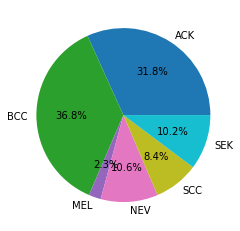

In [98]:
def pct_format(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)

cnts = (y_train.value_counts()+y_test.value_counts())
ax = cnts.plot(kind="pie",cmap="tab10", autopct=lambda pct: pct_format(pct, cnts))
# ax.legend(title='Classe',title_fontsize=20,loc='center left', bbox_to_anchor=(1.15, 0.5))
ax.set_ylabel("")

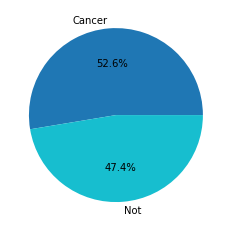

In [99]:
cnts = (y_train_bin.value_counts()+y_test_bin.value_counts())
cnts = cnts.set_axis(["Cancer", "Not"])
ax = cnts.plot(kind="pie",cmap="tab10", autopct=lambda pct: pct_format(pct, cnts))
# ax.legend(title='Classe',title_fontsize=20,loc='center left', bbox_to_anchor=(1.15, 0.5))
ax.set_ylabel("");

# Logistic Regression

Multinomial Log Reg
Model accuracy on train: 0.6197030924024495
Model accuracy on test: 0.6239283592224769

Binary Log Reg
Model accuracy on train: 0.7823776420120341
Model accuracy on test: 0.7739297739297739


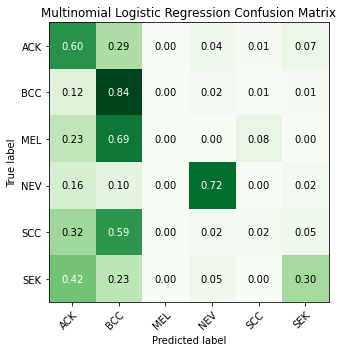

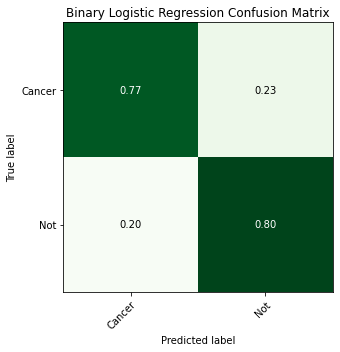

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import metrics

print("Multinomial Log Reg")
log_reg = LogisticRegression(random_state=RANDOM_SEED, max_iter=1e5)
log_reg.fit(x_train, y_train)
eval_model(log_reg, x_test, y_test, title="Multinomial Logistic Regression Confusion Matrix")
tr = cross_val_score(log_reg, x_train, y_train, cv=3, scoring='accuracy')
tst = cross_val_score(log_reg, x_test, y_test, cv=3, scoring='accuracy')
print(f"Model accuracy on train: {tr.mean()}\nModel accuracy on test: {tst.mean()}")

print("\nBinary Log Reg")
log_reg_bin = LogisticRegression(random_state=RANDOM_SEED, max_iter=1e5)
log_reg_bin.fit(x_train_bin, y_train_bin)
eval_model(log_reg_bin, x_test_bin, y_test_bin, title="Binary Logistic Regression Confusion Matrix", classes=["Not", "Cancer"])
tr = cross_val_score(log_reg_bin, x_train_bin, y_train_bin, cv=3, scoring='accuracy')
tst = cross_val_score(log_reg_bin, x_test_bin, y_test_bin, cv=3, scoring='accuracy')
print(f"Model accuracy on train: {tr.mean()}\nModel accuracy on test: {tst.mean()}")

# Random Forest Classifier

Multinomial RFC
Model accuracy on train: 0.672478471178212
Model accuracy on test: 0.6064991653226948

Binary RFC
Model accuracy on train: 0.8552842017720629
Model accuracy on test: 0.7804515745692217


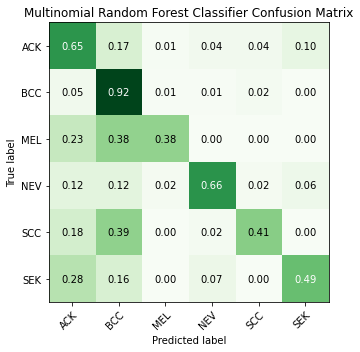

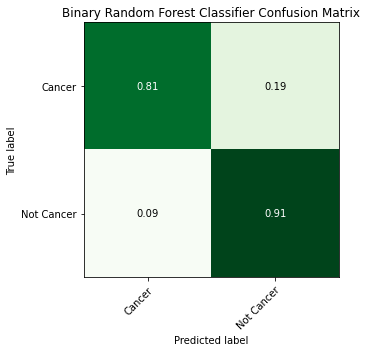

In [101]:
from sklearn.ensemble import RandomForestClassifier

print("Multinomial RFC")
rfc_clf = RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=150)
rfc_clf.fit(x_train, y_train)
eval_model(rfc_clf, x_test, y_test, title="Multinomial Random Forest Classifier Confusion Matrix")
tr = cross_val_score(rfc_clf, x_train, y_train, cv=3, scoring='accuracy')
tst = cross_val_score(rfc_clf, x_test, y_test, cv=3, scoring='accuracy')
print(f"Model accuracy on train: {tr.mean()}\nModel accuracy on test: {tst.mean()}")

print("\nBinary RFC")
rfc_clf_bin = RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=150)
rfc_clf_bin.fit(x_train_bin, y_train_bin)
eval_model(rfc_clf_bin, x_test_bin, y_test_bin, title="Binary Random Forest Classifier Confusion Matrix", classes=["Not Cancer", "Cancer"])
tr = cross_val_score(rfc_clf, x_train_bin, y_train_bin, cv=3, scoring='accuracy')
tst = cross_val_score(rfc_clf, x_test_bin, y_test_bin, cv=3, scoring='accuracy')
print(f"Model accuracy on train: {tr.mean()}\nModel accuracy on test: {tst.mean()}")

# XGBoost

Multinomial XGBoost
Model accuracy on train: 0.659416349465289
Model accuracy on test: 0.5891831480066774

Binary XGBoost
Model accuracy on train: 0.8552806476950033
Model accuracy on test: 0.7739156268568034


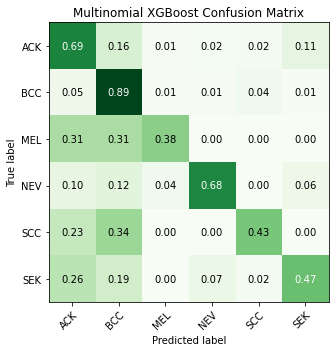

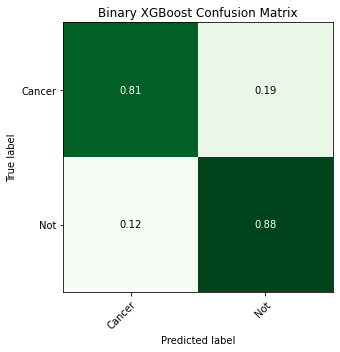

In [102]:
from xgboost import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder

xgb_encoder = OrdinalEncoder()
x_train_xgb = x_train.astype(np.float64)
y_train_xgb = xgb_encoder.fit_transform(y_train.to_numpy().reshape(-1,1))
x_test_xgb = x_test.astype(np.float64)
y_test_xgb = xgb_encoder.transform(y_test.to_numpy().reshape(-1,1))


print("Multinomial XGBoost")
sgb_clf = XGBClassifier(random_state=RANDOM_SEED, n_estimators=110, eval_metric='auc')
sgb_clf.fit(x_train_xgb, y_train_xgb)
y_pred = sgb_clf.predict(x_test_xgb)
y_pred_proba = sgb_clf.predict_proba(x_test_xgb)[:,1]
plot_confusion_matrix(xgb_encoder.inverse_transform(y_test_xgb), xgb_encoder.inverse_transform(y_pred.reshape(-1,1)), sorted(list(set(y_test))), normalize=True, title="Multinomial XGBoost Confusion Matrix", save_to_file=True);
tr = cross_val_score(sgb_clf, x_train_xgb, y_train_xgb, cv=3, scoring='accuracy')
tst = cross_val_score(sgb_clf, x_test_xgb, y_test_xgb, cv=3, scoring='accuracy')
print(f"Model accuracy on train: {tr.mean()}\nModel accuracy on test: {tst.mean()}")

x_train_xgb_bin = x_train_bin.astype(np.float64)
y_train_xgb_bin = xgb_encoder.fit_transform(y_train_bin.to_numpy().reshape(-1,1))
x_test_xgb_bin = x_test_bin.astype(np.float64)
y_test_xgb_bin = xgb_encoder.fit_transform(y_test_bin.to_numpy().reshape(-1,1))

print("\nBinary XGBoost")
sgb_clf_bin = XGBClassifier(random_state=RANDOM_SEED, n_estimators=110, eval_metric='auc')
sgb_clf_bin.fit(x_train_xgb_bin, y_train_bin.to_numpy().reshape(-1,1)) 
y_pred = sgb_clf_bin.predict(x_test_xgb_bin)
y_pred_proba = sgb_clf_bin.predict_proba(x_test_xgb_bin)[:,1]
plot_confusion_matrix(y_test_xgb_bin, y_pred.reshape(-1,1), ["Not", "Cancer"], normalize=True, title="Binary XGBoost Confusion Matrix", save_to_file=True);
tr = cross_val_score(sgb_clf_bin, x_train_xgb_bin, y_train_xgb_bin, cv=3, scoring='accuracy')
tst = cross_val_score(sgb_clf_bin, x_test_xgb_bin, y_test_xgb_bin, cv=3, scoring='accuracy')
print(f"Model accuracy on train: {tr.mean()}\nModel accuracy on test: {tst.mean()}")

In [103]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [h for h in np.arange(50,250,25)],
    'max_features': [k for k in np.arange(1,df.shape[1])]
}
grid = GridSearchCV(rfc_clf_bin,
                    params,
                    cv = 4,
                    scoring='accuracy',
                    return_train_score=True,
                    n_jobs=-1
)

grid.fit(x_train,y_train)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_estimators=150,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20],
                         'n_estimators': [50, 75, 100, 125, 150, 175, 200,
                                          225]},
             return_train_score=True, scoring='accuracy')

In [104]:
feature_importances = grid.best_estimator_.feature_importances_
importance_list = sorted(zip(feature_importances, x_train.columns.values), reverse=True)
importance_list

[(0.44658797576123316, 'age'),
 (0.08639569749797721, 'smoke'),
 (0.05618492840593345, 'drink'),
 (0.05322903980235453, 'pesticide'),
 (0.052548614955094164, 'cancer_history'),
 (0.051501924107990094, 'skin_cancer_history'),
 (0.03824123204054978, 'onehotencoder__x0_FOREARM'),
 (0.03811601594473386, 'has_sewage_system'),
 (0.031104017834158195, 'has_piped_water'),
 (0.022934074686502635, 'onehotencoder__x0_BACK'),
 (0.022422605579720856, 'onehotencoder__x0_OUTROS'),
 (0.022085612708049665, 'onehotencoder__x0_HAND'),
 (0.020313525419040395, 'onehotencoder__x0_FACE'),
 (0.015988299089626012, 'onehotencoder__x0_ARM'),
 (0.01344176681211903, 'onehotencoder__x0_CHEST'),
 (0.011469599406924755, 'onehotencoder__x0_NOSE'),
 (0.009260292171832595, 'onehotencoder__x0_EAR'),
 (0.008174777776159705, 'onehotencoder__x0_NECK')]

## Minimizing features

In [121]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformed_df = df.drop(['biopsed', 'patient_id', 'lesion_id', 'img_id', 'itch', 'hurt', 'grew', 'elevation', 'changed', 'bleed', 'region', 'has_sewage_system', 'has_piped_water', 'skin_cancer_history', 'cancer_history'], axis = 1)

transformed_df.head().transpose()

,0,1,2,3,4
smoke,True,False,True,True,False
drink,True,False,True,True,True
age,8,55,77,75,79
pesticide,True,False,True,True,False
diagnostic,NEV,BCC,ACK,ACK,BCC
is_cancer,0,1,0,0,1


In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    transformed_df.drop(['is_cancer', 'diagnostic'], axis=1),
    transformed_df['diagnostic'],
    test_size = 0.2,
    random_state=RANDOM_SEED,
)

x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(
    transformed_df.drop(['is_cancer', 'diagnostic'], axis=1),
    transformed_df['is_cancer'],
    test_size = 0.2,
    random_state=RANDOM_SEED,
)
y_train_bin = y_train_bin.astype(np.float64)
y_test_bin = y_test_bin.astype(np.float64)

print(f"{x_train.shape=}")
print(f"{x_test.shape=}")
print(f"{y_train.shape=}")
print(f"{y_test.shape=}")
print(f"{x_train_bin.shape=}")
print(f"{x_test_bin.shape=}")
print(f"{y_train_bin.shape=}")
print(f"{y_test_bin.shape=}")

x_train.shape=(1838, 4)
x_test.shape=(460, 4)
y_train.shape=(1838,)
y_test.shape=(460,)
x_train_bin.shape=(1838, 4)
x_test_bin.shape=(460, 4)
y_train_bin.shape=(1838,)
y_test_bin.shape=(460,)


Multinomial Log Reg
Model accuracy on train: 0.5631079693069905
Model accuracy on test: 0.5608465608465608

Binary Log Reg
Model accuracy on train: 0.7497325557012727
Model accuracy on test: 0.7304699657640835


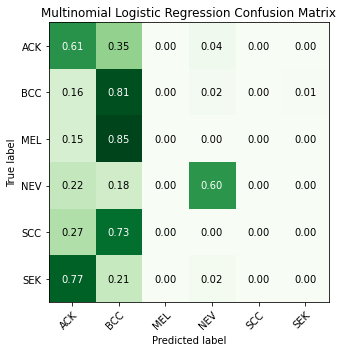

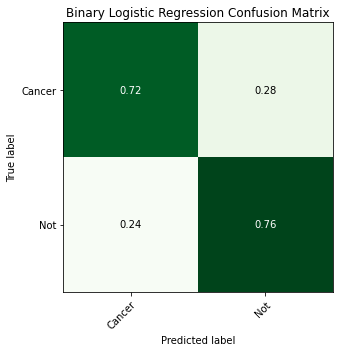

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import metrics

print("Multinomial Log Reg")
log_reg = LogisticRegression(random_state=RANDOM_SEED, max_iter=1e5)
log_reg.fit(x_train, y_train)
eval_model(log_reg, x_test, y_test, title="Multinomial Logistic Regression Confusion Matrix")
tr = cross_val_score(log_reg, x_train, y_train, cv=3, scoring='accuracy')
tst = cross_val_score(log_reg, x_test, y_test, cv=3, scoring='accuracy')
print(f"Model accuracy on train: {tr.mean()}\nModel accuracy on test: {tst.mean()}")

print("\nBinary Log Reg")
log_reg_bin = LogisticRegression(random_state=RANDOM_SEED, max_iter=1e5)
log_reg_bin.fit(x_train_bin, y_train_bin)
eval_model(log_reg_bin, x_test_bin, y_test_bin, title="Binary Logistic Regression Confusion Matrix", classes=["Not", "Cancer"])
tr = cross_val_score(log_reg_bin, x_train_bin, y_train_bin, cv=3, scoring='accuracy')
tst = cross_val_score(log_reg_bin, x_test_bin, y_test_bin, cv=3, scoring='accuracy')
print(f"Model accuracy on train: {tr.mean()}\nModel accuracy on test: {tst.mean()}")

Multinomial RFC
Model accuracy on train: 0.5712707957933943
Model accuracy on test: 0.44560450442803384

Binary RFC
Model accuracy on train: 0.7997784032953402
Model accuracy on test: 0.7216280451574569


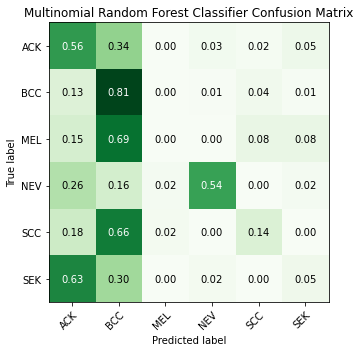

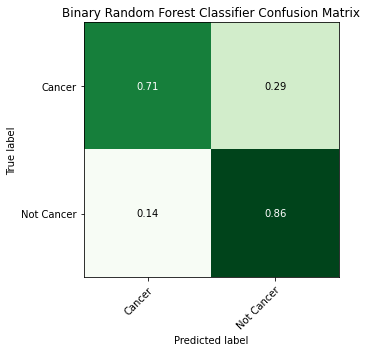

In [124]:
from sklearn.ensemble import RandomForestClassifier

print("Multinomial RFC")
rfc_clf = RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=150)
rfc_clf.fit(x_train, y_train)
eval_model(rfc_clf, x_test, y_test, title="Multinomial Random Forest Classifier Confusion Matrix")
tr = cross_val_score(rfc_clf, x_train, y_train, cv=3, scoring='accuracy')
tst = cross_val_score(rfc_clf, x_test, y_test, cv=3, scoring='accuracy')
print(f"Model accuracy on train: {tr.mean()}\nModel accuracy on test: {tst.mean()}")

print("\nBinary RFC")
rfc_clf_bin = RandomForestClassifier(random_state=RANDOM_SEED, n_estimators=150)
rfc_clf_bin.fit(x_train_bin, y_train_bin)
eval_model(rfc_clf_bin, x_test_bin, y_test_bin, title="Binary Random Forest Classifier Confusion Matrix", classes=["Not Cancer", "Cancer"])
tr = cross_val_score(rfc_clf, x_train_bin, y_train_bin, cv=3, scoring='accuracy')
tst = cross_val_score(rfc_clf, x_test_bin, y_test_bin, cv=3, scoring='accuracy')
print(f"Model accuracy on train: {tr.mean()}\nModel accuracy on test: {tst.mean()}")

Multinomial XGBoost
Model accuracy on train: 0.5805282780141239
Model accuracy on test: 0.45651189768836825

Binary XGBoost
Model accuracy on train: 0.8073992330301705
Model accuracy on test: 0.7259994907053731


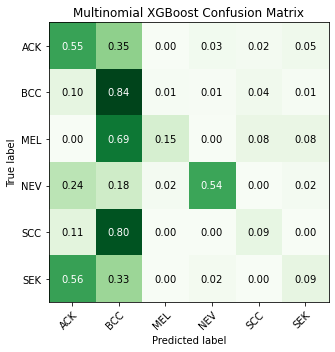

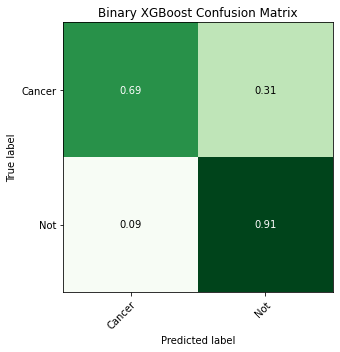

In [125]:
from xgboost import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder

xgb_encoder = OrdinalEncoder()
x_train_xgb = x_train.astype(np.float64)
y_train_xgb = xgb_encoder.fit_transform(y_train.to_numpy().reshape(-1,1))
x_test_xgb = x_test.astype(np.float64)
y_test_xgb = xgb_encoder.transform(y_test.to_numpy().reshape(-1,1))


print("Multinomial XGBoost")
sgb_clf = XGBClassifier(random_state=RANDOM_SEED, n_estimators=110, eval_metric='auc')
sgb_clf.fit(x_train_xgb, y_train_xgb)
y_pred = sgb_clf.predict(x_test_xgb)
y_pred_proba = sgb_clf.predict_proba(x_test_xgb)[:,1]
plot_confusion_matrix(xgb_encoder.inverse_transform(y_test_xgb), xgb_encoder.inverse_transform(y_pred.reshape(-1,1)), sorted(list(set(y_test))), normalize=True, title="Multinomial XGBoost Confusion Matrix", save_to_file=True);
tr = cross_val_score(sgb_clf, x_train_xgb, y_train_xgb, cv=3, scoring='accuracy')
tst = cross_val_score(sgb_clf, x_test_xgb, y_test_xgb, cv=3, scoring='accuracy')
print(f"Model accuracy on train: {tr.mean()}\nModel accuracy on test: {tst.mean()}")

x_train_xgb_bin = x_train_bin.astype(np.float64)
y_train_xgb_bin = xgb_encoder.fit_transform(y_train_bin.to_numpy().reshape(-1,1))
x_test_xgb_bin = x_test_bin.astype(np.float64)
y_test_xgb_bin = xgb_encoder.fit_transform(y_test_bin.to_numpy().reshape(-1,1))

print("\nBinary XGBoost")
sgb_clf_bin = XGBClassifier(random_state=RANDOM_SEED, n_estimators=110, eval_metric='auc')
sgb_clf_bin.fit(x_train_xgb_bin, y_train_bin.to_numpy().reshape(-1,1)) 
y_pred = sgb_clf_bin.predict(x_test_xgb_bin)
y_pred_proba = sgb_clf_bin.predict_proba(x_test_xgb_bin)[:,1]
plot_confusion_matrix(y_test_xgb_bin, y_pred.reshape(-1,1), ["Not", "Cancer"], normalize=True, title="Binary XGBoost Confusion Matrix", save_to_file=True);
tr = cross_val_score(sgb_clf_bin, x_train_xgb_bin, y_train_xgb_bin, cv=3, scoring='accuracy')
tst = cross_val_score(sgb_clf_bin, x_test_xgb_bin, y_test_xgb_bin, cv=3, scoring='accuracy')
print(f"Model accuracy on train: {tr.mean()}\nModel accuracy on test: {tst.mean()}")

In [126]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [h for h in np.arange(50,250,25)],
    'max_features': [k for k in np.arange(1,df.shape[1])]
}
grid = GridSearchCV(rfc_clf_bin,
                    params,
                    cv = 4,
                    scoring='accuracy',
                    return_train_score=True,
                    n_jobs=-1
)

grid.fit(x_train,y_train)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_estimators=150,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20],
                         'n_estimators': [50, 75, 100, 125, 150, 175, 200,
                                          225]},
             return_train_score=True, scoring='accuracy')

In [127]:
feature_importances = grid.best_estimator_.feature_importances_
importance_list = sorted(zip(feature_importances, x_train.columns.values), reverse=True)
importance_list

[(0.6246198498164285, 'age'),
 (0.19633781051977975, 'smoke'),
 (0.09928912875505488, 'drink'),
 (0.07975321090873681, 'pesticide')]